## Sandbox on blank emission

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
from allosaurus.app import read_recognizer
from IPython.display import Audio
from praatio import textgrid

In [3]:
model = read_recognizer()

In [4]:
Audio("data/new_annot/Backchannel_3m.wav")

In [22]:
from itertools import zip_longest
frames = model.recognize("data/new_annot/Backchannel_3m.wav", lang_id="cmn", emit=2, emit_blank=True)
tg = textgrid.Textgrid()
frame_entries = [(x.offset_s, y.offset_s, x.phone_token) for x, y in zip(frames, frames[1:])]
frame_tier = textgrid.IntervalTier('allosaurus-emit2', frame_entries[::1], 0, frames[-1].offset_s+.045)
tg_path_x = "data/new_annot/Backchannel_3m.wav".replace(".wav", f".allo.emit2b.TextGrid")
tg.addTier(frame_tier)
tg.save(tg_path_x, format="short_textgrid", includeBlankSpaces=False)

## Use phone mask in Recognizer

In [1]:
from allosaurus.app import read_recognizer
from praatio import textgrid
from itertools import zip_longest

In [2]:
model = read_recognizer()

In [8]:
wav_path = "data/趙正宇-127849.wav"

In [13]:
emit_val = 2
frames = model.recognize(wav_path, lang_id="cmn", emit=emit_val)
for x, y in zip_longest(frames, frames[1:]):
    if y is None:
        end_time = x.offset_s+.045
    else:
        end_time = y.offset_s
    x.endtime_s = end_time
        
tg = textgrid.Textgrid()
frame_entries = [(x.offset_s, y.offset_s, x.phone_token) for x, y in zip(frames, frames[1:])]
frame_tier = textgrid.IntervalTier('allosaurus', frame_entries[::1], 0, frames[-1].offset_s+.045)
tg_path_x = str(wav_path).replace(".wav", f".allo.emit{emit_val}.TextGrid")
tg.addTier(frame_tier)
tg.save(tg_path_x, format="short_textgrid", includeBlankSpaces=False)


## Extract bilstm vectors

In [15]:
import numpy as np
vecs = np.vstack([x.bilstm_h for x in frames])
phones = [x.phone_token for x in frames]

In [16]:
vecs.shape

(5066, 640)

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE()
proj = tsne.fit_transform(vecs)

C:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [20]:
from sklearn.preprocessing import LabelEncoder
phone_enc = LabelEncoder()
phone_vecs = phone_enc.fit_transform(phones)

In [30]:
import panphon

In [31]:
ft = panphon.FeatureTable()

In [40]:
ft.fts("ɤ̟")

<Segment [+syl, +son, -cons, +cont, 0delrel, -lat, -nas, 0strid, +voi, -sg, -cg, 0ant, -cor, 0distr, -lab, -hi, -lo, +back, -round, -velaric, +tense, -long, 0hitone, 0hireg]>

In [23]:
import plotly_express as px

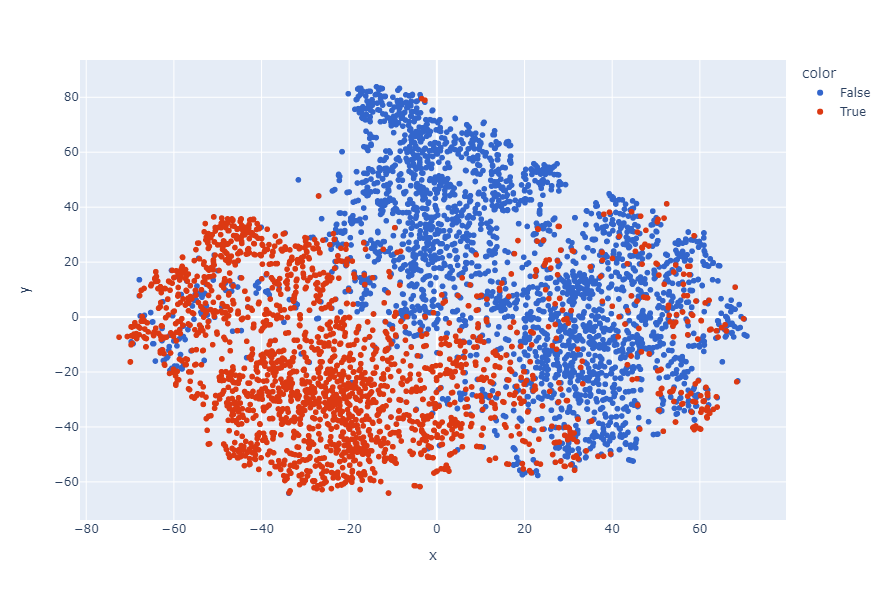

In [52]:
vowels = "aeəioɤuy"
mask = np.array([x in vowels for x in phones])
proj_sub = proj[~mask, :]
phones_sub = np.array(phones)[~mask]
target = phones_sub
# fig = px.scatter(x=proj_sub[:,0], y=proj_sub[:,1], color=target, color_discrete_sequence=px.colors.qualitative.G10)
fig = px.scatter(x=proj[:,0], y=proj[:,1], color=mask, color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(width=600, height=600)

In [54]:
mfcc_vecs = np.vstack([x.mfcc_vec for x in frames])
proj_mfcc = TSNE(learning_rate="auto", init='pca').fit_transform(mfcc_vecs)

C:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



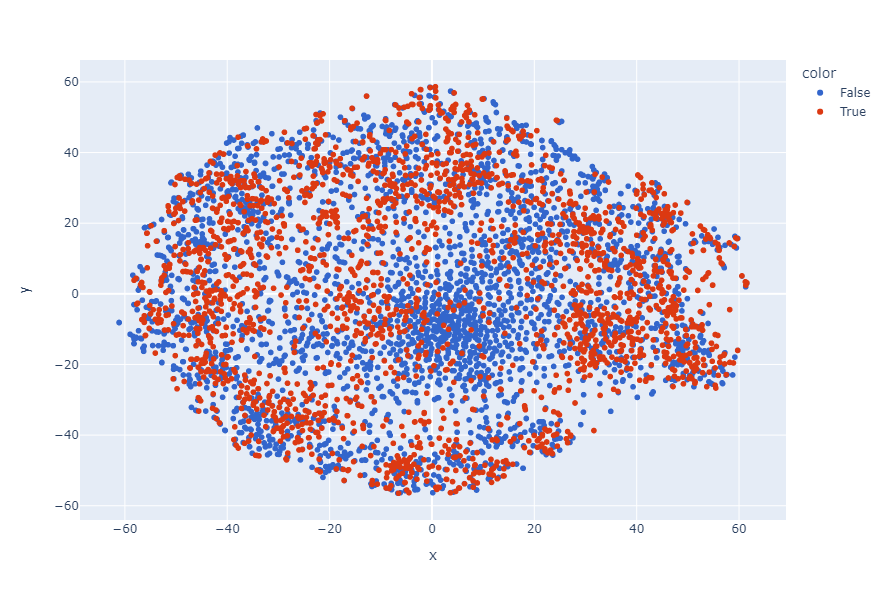

In [55]:
vowels = "aeəioɤuy"
mask = np.array([x in vowels for x in phones])
fig = px.scatter(x=proj_mfcc[:,0], y=proj_mfcc[:,1], color=mask, color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(width=600, height=600)